<a href="https://colab.research.google.com/github/AhmedZaghl0ul/Machine-Learning/blob/main/Mnist_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import itertools
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import Adam , RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau , ModelCheckpoint , EarlyStopping

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train = pd.read_csv('/content/drive/MyDrive/DataSets/Mnist Dataset/train.csv')
test = pd.read_csv('/content/drive/MyDrive/DataSets/Mnist Dataset/test.csv')

In [4]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
ytrain = train['label']
xtrain = train.drop(columns='label')
del train

In [6]:
ytrain.value_counts()

,count
label,
1,4684
7,4401
3,4351
9,4188
2,4177
6,4137
0,4132
4,4072
8,4063


In [7]:
xtrain.isna().any().describe()

,0
count,784
unique,1
top,False
freq,784


In [8]:
xtrain = xtrain / 255.0
test = test / 255.0

In [9]:
xtrain.shape

(42000, 784)

In [10]:
xtrain = xtrain.values.reshape(-1 , 28 , 28 , 1)
test = test.values.reshape(-1 , 28 , 28 , 1)

In [11]:
test.shape , xtrain.shape

((28000, 28, 28, 1), (42000, 28, 28, 1))

In [12]:
ytrain = to_categorical(ytrain , num_classes=10)

In [13]:
xtrain , xval , ytrain , yval = train_test_split(xtrain , ytrain , test_size=0.1 , random_state=2)

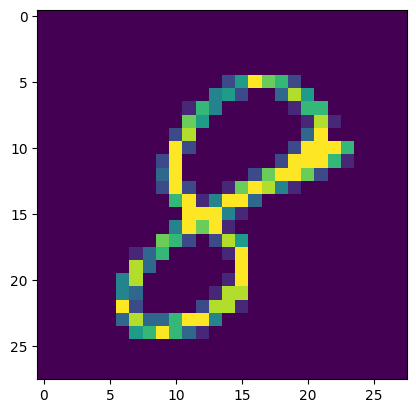

In [14]:
g = plt.imshow(xtrain[0][:,:,0])

In [15]:
ytrain[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

In [16]:
model = Sequential()
model.add(Conv2D(filters=32 , kernel_size=(5,5) , padding='Same' , activation='relu' , input_shape=(28,28,1)))
model.add(Conv2D(filters=32 , kernel_size=(5,5) , padding='Same' , activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64 , kernel_size=(3,3) , padding='Same' , activation='relu'))
model.add(Conv2D(filters=64 , kernel_size=(3,3) , padding='Same' , activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2) , strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256 , activation='relu'))
model.add(Dense(128 , activation='relu'))
model.add(Dense(64 , activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10 , activation='softmax'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       803,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 926,762 (3.54 MB)

 Trainable params: 926,762 (3.54 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(optimizer=Adam(learning_rate=0.001) , loss='categorical_crossentropy' , metrics=['accuracy'])

In [19]:
from keras.callbacks import ReduceLROnPlateau , ModelCheckpoint , EarlyStopping

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy' , patience=2 , verbose=1 , factor=0.5 , min_lr=0.00001)
checkpoint = ModelCheckpoint('model.h5' , monitor='val_accuracy' , verbose=1 , save_best_only=True , mode='max')
early_stopping = EarlyStopping(monitor='val_accuracy' , patience=3 , verbose=1 , mode='max')

In [20]:
model.fit(xtrain , ytrain , batch_size=64 , epochs=100 , verbose=2, validation_data=(xval , yval) , callbacks=[learning_rate_reduction , checkpoint , early_stopping])

Epoch 1/100

Epoch 1: val_accuracy improved from -inf to 0.97833, saving model to model.h5


591/591 - 19s - 32ms/step - accuracy: 0.8887 - loss: 0.3644 - val_accuracy: 0.9783 - val_loss: 0.0753 - learning_rate: 1.0000e-03
Epoch 2/100

Epoch 2: val_accuracy improved from 0.97833 to 0.98476, saving model to model.h5


591/591 - 3s - 6ms/step - accuracy: 0.9745 - loss: 0.1002 - val_accuracy: 0.9848 - val_loss: 0.0540 - learning_rate: 1.0000e-03
Epoch 3/100

Epoch 3: val_accuracy improved from 0.98476 to 0.98500, saving model to model.h5


591/591 - 3s - 5ms/step - accuracy: 0.9812 - loss: 0.0747 - val_accuracy: 0.9850 - val_loss: 0.0449 - learning_rate: 1.0000e-03
Epoch 4/100

Epoch 4: val_accuracy improved from 0.98500 to 0.99071, saving model to model.h5


591/591 - 3s - 6ms/step - accuracy: 0.9852 - loss: 0.0584 - val_accuracy: 0.9907 - val_loss: 0.0372 - learning_rate: 1.0000e-03
Epoch 5/100

Epoch 5: val_accuracy did not improve from 0.99071
591/591 - 4s - 6ms/step - accuracy: 0.9870 - loss: 0.0493 - val_accuracy: 0.9886 - val_loss: 0.0427 - learning_rate: 1.0000e-03
Epoch 6/100

Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 6: val_accuracy did not improve from 0.99071
591/591 - 3s - 5ms/step - accuracy: 0.9886 - loss: 0.0443 - val_accuracy: 0.9883 - val_loss: 0.0503 - learning_rate: 1.0000e-03
Epoch 7/100

Epoch 7: val_accuracy improved from 0.99071 to 0.99190, saving model to model.h5


591/591 - 3s - 5ms/step - accuracy: 0.9933 - loss: 0.0258 - val_accuracy: 0.9919 - val_loss: 0.0316 - learning_rate: 5.0000e-04
Epoch 8/100

Epoch 8: val_accuracy did not improve from 0.99190
591/591 - 3s - 6ms/step - accuracy: 0.9946 - loss: 0.0210 - val_accuracy: 0.9919 - val_loss: 0.0335 - learning_rate: 5.0000e-04
Epoch 9/100

Epoch 9: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 9: val_accuracy did not improve from 0.99190
591/591 - 5s - 9ms/step - accuracy: 0.9952 - loss: 0.0173 - val_accuracy: 0.9907 - val_loss: 0.0523 - learning_rate: 5.0000e-04
Epoch 10/100

Epoch 10: val_accuracy did not improve from 0.99190
591/591 - 3s - 5ms/step - accuracy: 0.9968 - loss: 0.0117 - val_accuracy: 0.9917 - val_loss: 0.0426 - learning_rate: 2.5000e-04
Epoch 10: early stopping


In [21]:
ypred = model.predict(xval)
ypred = np.argmax(ypred , axis=1)

ytrue = np.argmax(yval , axis=1)

132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [22]:
from sklearn.metrics import classification_report

print(classification_report(ytrue , ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       411
           1       1.00      0.99      0.99       485
           2       0.99      1.00      0.99       403
           3       0.99      0.99      0.99       418
           4       0.99      0.99      0.99       461
           5       1.00      0.99      0.99       372
           6       0.99      0.98      0.99       413
           7       1.00      1.00      1.00       446
           8       0.97      1.00      0.98       382
           9       0.99      0.99      0.99       409

    accuracy                           0.99      4200
   macro avg       0.99      0.99      0.99      4200
weighted avg       0.99      0.99      0.99      4200



# Task
Visualize 5 random images from the training data along with their true labels.

## Select random images

### Subtask:
Randomly select the indices of 5 images from the training data.


**Reasoning**:
Generate an array of 5 random integers as indices for selecting images.



In [23]:
random_indices = np.random.randint(0, xtrain.shape[0], 5)

## Get true labels

### Subtask:
Retrieve the true labels for the selected images.


**Reasoning**:
Retrieve the true labels for the selected images by using the random indices to select from the one-hot encoded ytrain and then converting them back to integer labels.



In [24]:
true_labels = np.argmax(ytrain[random_indices], axis=1)

**Reasoning**:
The previous command failed because numpy was not recognized. Although numpy was imported in an earlier cell, it was not available in the current execution environment. I need to re-import numpy and then retrieve the true labels.



In [25]:
import numpy as np
true_labels = np.argmax(ytrain[random_indices], axis=1)

## Reshape images

### Subtask:
Reshape the selected image data back to their original 28x28 format for visualization.


**Reasoning**:
Reshape the selected image data back to their original 28x28 format for visualization.



In [26]:
selected_images = xtrain[random_indices]
reshaped_images = selected_images.reshape(-1, 28, 28)

## Visualize images and labels

### Subtask:
Display each selected image along with its true label.


**Reasoning**:
Display the selected images with their true labels.



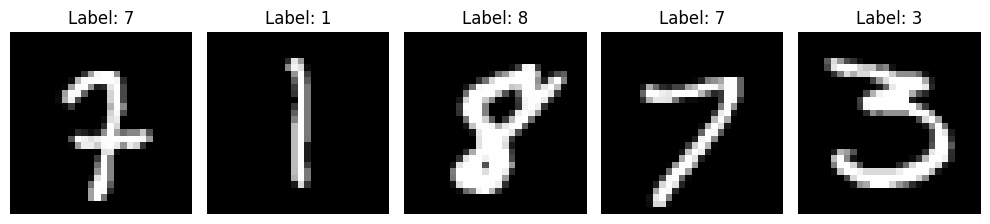

In [27]:
plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(zip(reshaped_images, true_labels)):
    plt.subplot(1, 5, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f'Label: {label}')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [29]:
results = model.predict(test)
results = np.argmax(results , axis=1)
results = pd.Series(results , name='Label')

875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [30]:
results

,Label
0,2
1,0
2,9
3,9
4,3
...,...
27995,9
27996,7
27997,3
27998,9


In [31]:
submission = pd.concat([pd.Series(range(1 , 28001) , name='ImageId') , results] , axis=1)
submission.to_csv('submission.csv' , index=False)